In [13]:
!pip install librosa
!pip install tensorflow

import numpy as np
import librosa
import scipy as sp
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [14]:
#Load audio file in the player..
AudioPath="Downloads/Piano.wav"
ipd.Audio(AudioPath)

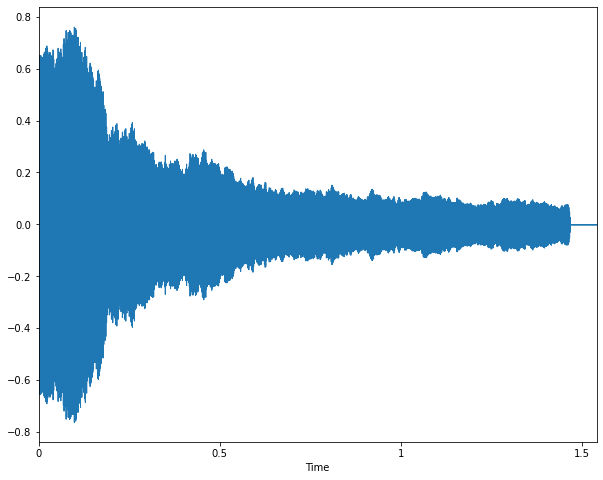

In [15]:


#Load audio file
Data1,sr=librosa.load(AudioPath)
plt.figure(figsize=(10,8))
librosa.display.waveplot(Data1,sr=sr,alpha=1)
FT=np.fft.fft(Data1)
Magnitude=np.absolute(FT)
Frequency=np.linspace(0,sr,len(Magnitude))



In [16]:
# derive spectrum using FT
FourierTransform = sp.fft.fft(Data1)
Magnitude = np.absolute(FourierTransform)#Modulus value for magnitude i.e. y axis of spectrum
Frequency = np.linspace(0, sr, len(Magnitude)) #x axis of spectrum

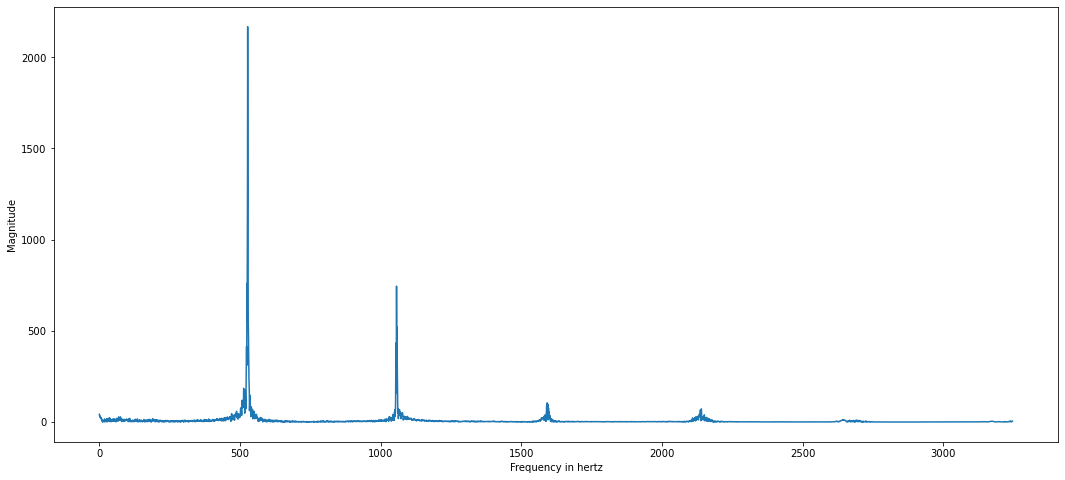

In [17]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(Frequency[:5000], Magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency in hertz")
plt.ylabel("Magnitude")
plt.show()

In [18]:
##500 is the main frequency here,1000 is twice the frequency of fundamental, 1500 is thrice and all these are natural harmonics.
#523 for note C5
len(Data1)
#sr with librosa is 22050 .So, time period of one sample is reciprocal of sampling rate 
Timeonesample=1/sr
Timeonesample



4.5351473922902495e-05

In [19]:
Cycleduration = 1 / 523
Cycleduration

0.0019120458891013384

In [20]:
#EAsy to visualise 400*onesample duration
Duration400samples = 400 * Cycleduration
Duration400samples

0.7648183556405354

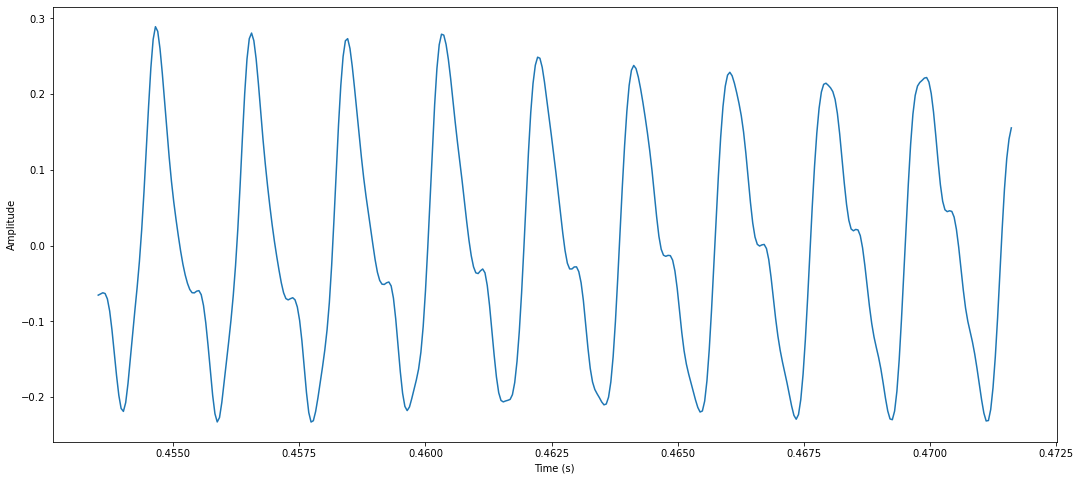

In [22]:
# zoom in to the waveform  to see all the cycles..
samples = range(len(Data1))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], Data1[10000:10400]) 
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

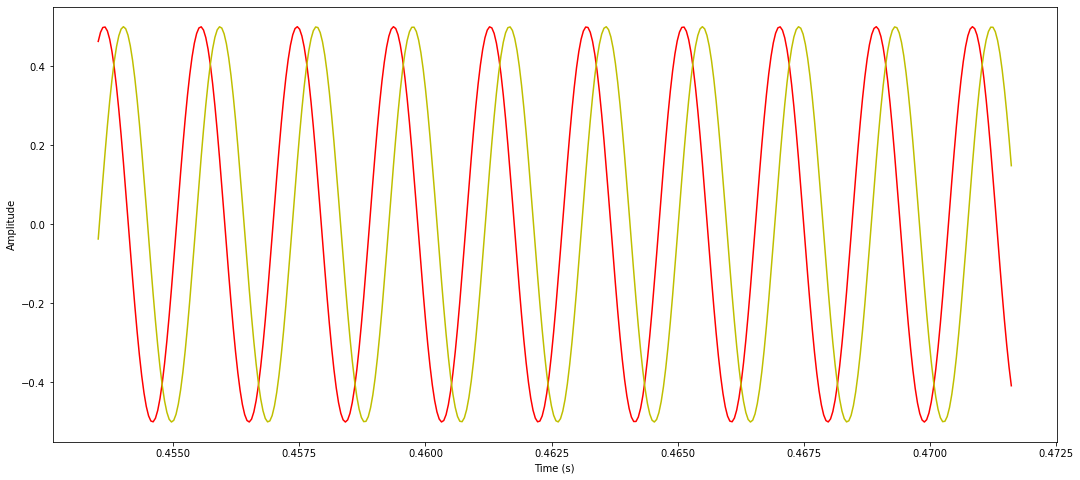

In [28]:
# create a sinusoid.We have 2 phases and two sinusoids made.Then we plot 2 sinusoids of yellow and red color.

f = 523
phase = 0
phase2 = 0.2

sin = 0.5 * np.sin(2*np.pi * (f * t - phase))
sin2 = 0.5 * np.sin(2*np.pi * (f * t - phase2))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], sin2[10000:10400], color="y")


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

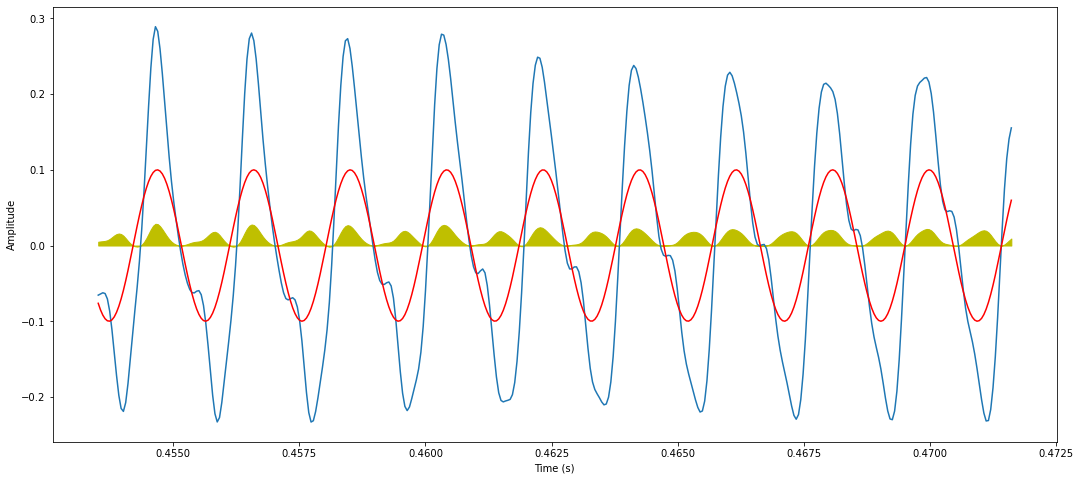

In [36]:
# compare signal and sinusoids .Sinusoid is red and signal blue
#Both sine and signall have same frequency 523.
f = 523
phase = 0.55

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], Data1[10000:10400]) 
plt.plot(t[10000:10400], sin[10000:10400], color="r")

plt.fill_between(t[10000:10400], sin[10000:10400]*Data1[10000:10400], color="y")
#this multiplies sine and signal to give yellow area.Area defines the similarity.

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

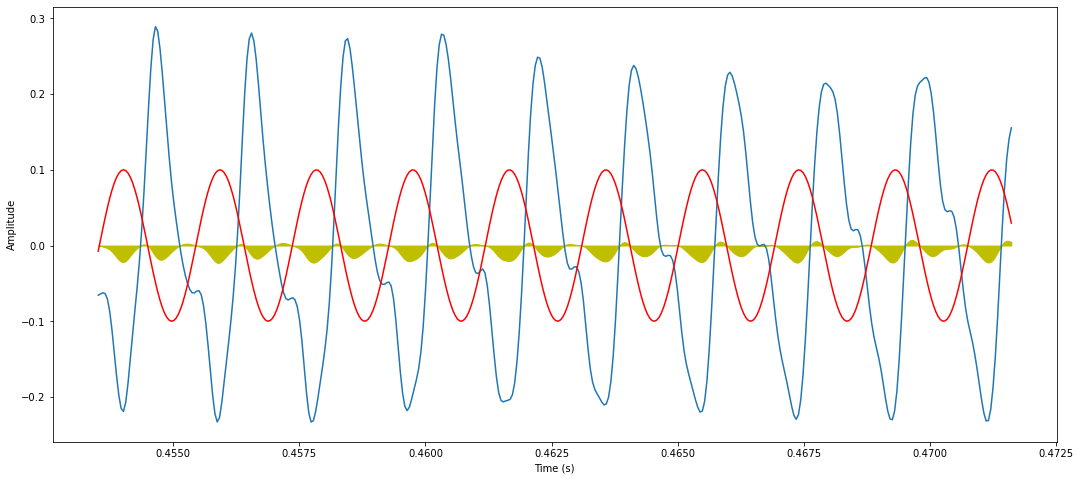

In [37]:
# compare signal and sinusoids .Sinusoid is red and signal blue
#Both sine and signall have same frequency 523.
f = 523
phase = 0.2

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], Data1[10000:10400]) 
plt.plot(t[10000:10400], sin[10000:10400], color="r")

plt.fill_between(t[10000:10400], sin[10000:10400]*Data1[10000:10400], color="y")
#this multiplies sine and signal to give yellow area.Area defines the similarity.
#Change of phase gives negative area

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()